In [1]:
import pandas as pd
from fbprophet import Prophet


In [2]:
df = pd.read_csv('example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [3]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Thurstan\.conda\envs\pythonlearningx64\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [4]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [5]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.202640,7.436427,8.933633
3266,2017-01-16,8.527650,7.804132,9.234550
3267,2017-01-17,8.315045,7.549783,9.042194
3268,2017-01-18,8.147637,7.419290,8.852401
3269,2017-01-19,8.159557,7.393312,8.918529


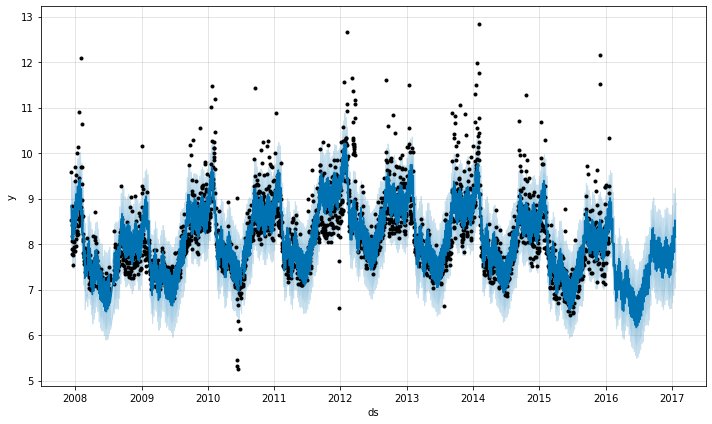

In [6]:
# Python
fig1 = m.plot(forecast)


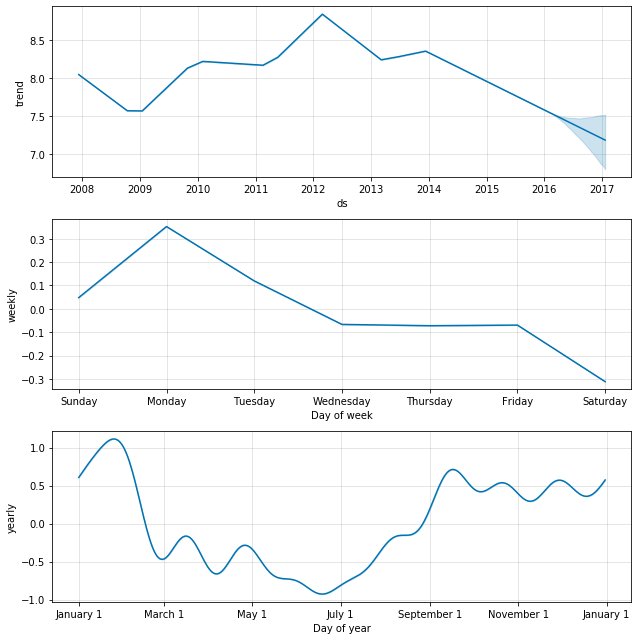

In [7]:
# Python
fig2 = m.plot_components(forecast)


# an example from me 

In [8]:
df = pd.read_csv('city_temperature.csv')


C:\Users\Thurstan\.conda\envs\pythonlearningx64\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
df['recdate'] = pd.to_datetime(df[['Year','Month','Day']], errors='coerce')

In [10]:
df.drop(df[df['recdate'].isna() ==True].index, inplace=True) #specific condition


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2906277 entries, 0 to 2906326
Data columns (total 9 columns):
 #   Column          Dtype         
---  ------          -----         
 0   Region          object        
 1   Country         object        
 2   State           object        
 3   City            object        
 4   Month           int64         
 5   Day             int64         
 6   Year            int64         
 7   AvgTemperature  float64       
 8   recdate         datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 221.7+ MB


In [12]:
df.describe()

,Month,Day,Year,AvgTemperature
count,2.906277e+06,2.906277e+06,2.906277e+06,2.906277e+06
mean,6.469093e+00,1.571665e+01,2.006650e+03,5.600759e+01
std,3.456450e+00,8.800403e+00,2.235200e+01,3.211744e+01
min,1.000000e+00,1.000000e+00,2.000000e+02,-9.900000e+01
25%,3.000000e+00,8.000000e+00,2.001000e+03,4.580000e+01
50%,6.000000e+00,1.600000e+01,2.007000e+03,6.250000e+01
75%,9.000000e+00,2.300000e+01,2.013000e+03,7.550000e+01
max,1.200000e+01,3.100000e+01,2.020000e+03,1.100000e+02


In [34]:
#pick a city

mycity = df[df['City']=='London'][['recdate','AvgTemperature']]
# need a ds (Datestamp) and y column
mycity.set_axis(['ds','y'], axis=1, inplace=True)#if you want to do all cols at once
mycity.tail()

,ds,y
996096,2020-05-09,64.1
996097,2020-05-10,54.1
996098,2020-05-11,47.0
996099,2020-05-12,48.9
996100,2020-05-13,47.8


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Thurstan\.conda\envs\pythonlearningx64\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


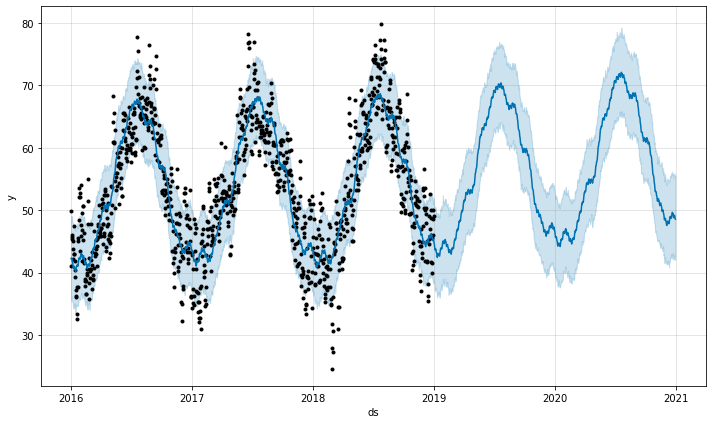

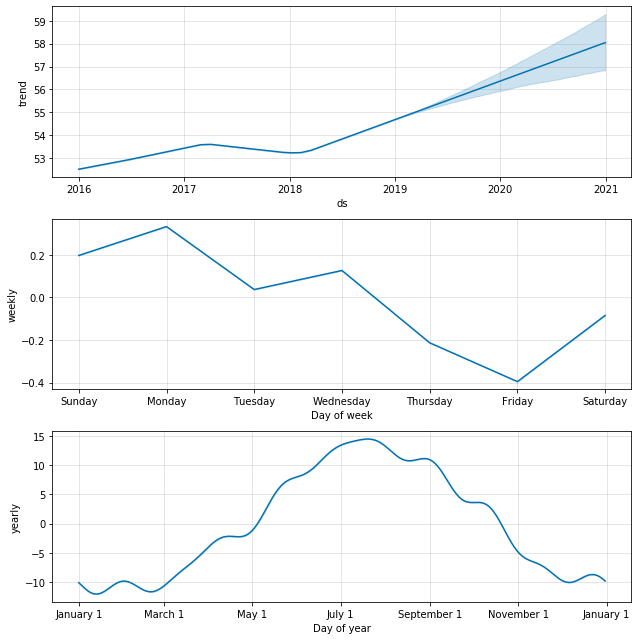

In [47]:
mycity = mycity[(mycity['ds']< '2019-01-01')&(mycity['ds']>= '2016-01-01')&(mycity['y']>=-60)]

m = Prophet()
m.fit(mycity)

future = m.make_future_dataframe(periods=730)
#print(future.tail())

forecast = m.predict(future)
#print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

fig1 = m.plot(forecast)

fig2 = m.plot_components(forecast)


In [44]:
forecast[forecast['ds']>='2018-01-01'][0:5]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
727,2018-01-01,53.231935,37.188439,49.813262,53.231935,53.231935,-9.685893,-9.685893,-9.685893,0.332927,0.332927,0.332927,-10.018820,-10.018820,-10.018820,0.0,0.0,0.0,43.546042
728,2018-01-02,53.231056,36.522577,49.399138,53.231056,53.231056,-10.218893,-10.218893,-10.218893,0.037066,0.037066,0.037066,-10.255959,-10.255959,-10.255959,0.0,0.0,0.0,43.012163
729,2018-01-03,53.230177,35.994056,49.069194,53.230177,53.230177,-10.369123,-10.369123,-10.369123,0.126523,0.126523,0.126523,-10.495646,-10.495646,-10.495646,0.0,0.0,0.0,42.861055
730,2018-01-05,53.228419,35.570410,48.212545,53.228419,53.228419,-11.358030,-11.358030,-11.358030,-0.395830,-0.395830,-0.395830,-10.962200,-10.962200,-10.962200,0.0,0.0,0.0,41.870389
731,2018-01-06,53.228728,35.746457,48.558801,53.228728,53.228728,-11.263638,-11.263638,-11.263638,-0.084592,-0.084592,-0.084592,-11.179046,-11.179046,-11.179046,0.0,0.0,0.0,41.965090


In [45]:
forecast[forecast['ds']>='2019-01-01'][0:5]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1088,2019-01-01,54.680964,38.228890,51.221612,54.680964,54.680964,-9.923460,-9.923460,-9.923460,0.037066,0.037066,0.037066,-9.960526,-9.960526,-9.960526,0.0,0.0,0.0,44.757504
1089,2019-01-02,54.685580,38.773723,51.831085,54.685580,54.685580,-10.069713,-10.069713,-10.069713,0.126523,0.126523,0.126523,-10.196236,-10.196236,-10.196236,0.0,0.0,0.0,44.615867
1090,2019-01-03,54.690195,37.491960,50.246364,54.690195,54.690195,-10.649103,-10.649103,-10.649103,-0.213338,-0.213338,-0.213338,-10.435765,-10.435765,-10.435765,0.0,0.0,0.0,44.041092
1091,2019-01-04,54.694811,37.226508,49.826384,54.694811,54.694811,-11.069831,-11.069831,-11.069831,-0.395830,-0.395830,-0.395830,-10.674001,-10.674001,-10.674001,0.0,0.0,0.0,43.624980
1092,2019-01-05,54.699426,37.013645,50.342890,54.699426,54.699426,-10.990424,-10.990424,-10.990424,-0.084592,-0.084592,-0.084592,-10.905832,-10.905832,-10.905832,0.0,0.0,0.0,43.709002


# playing with the settings

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Thurstan\.conda\envs\pythonlearningx64\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


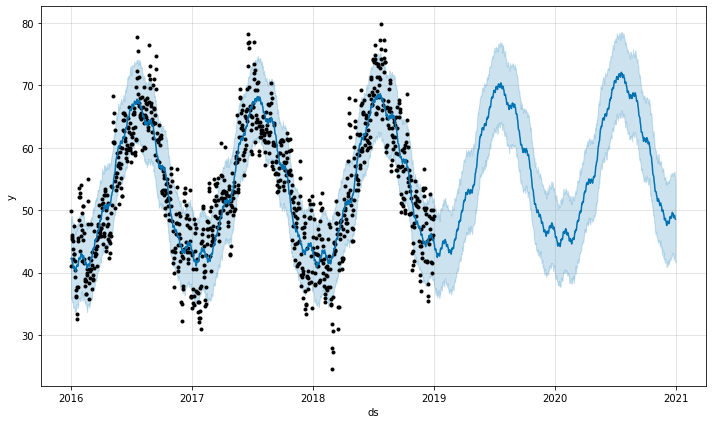

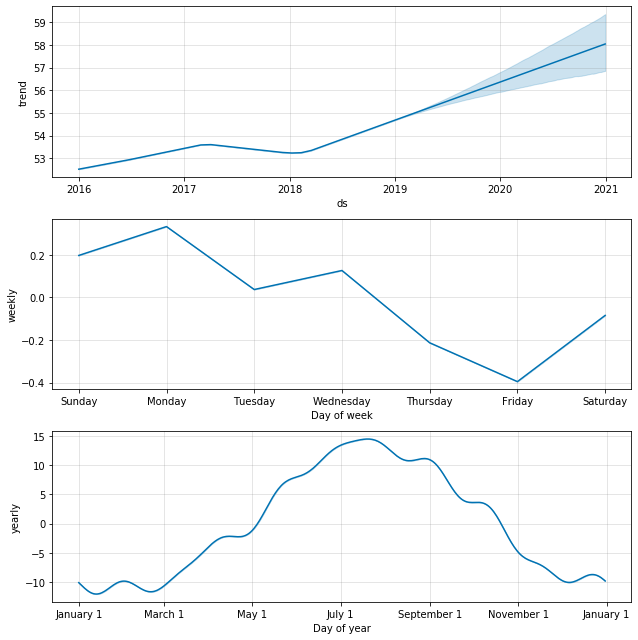

In [48]:
mycity = mycity[(mycity['ds']< '2019-01-01')&(mycity['ds']>= '2016-01-01')&(mycity['y']>=-60)]

m =  Prophet(#data,
            #interval_width = 0.95,
            yearly_seasonality = True
            #weekly_seasonality = True,
            #daily_seasonality = True,
            #holidays = None,
            #changepoint_prior_scale = 0.05
            )


m.fit(mycity)

future = m.make_future_dataframe(periods=730)
#print(future.tail())

forecast = m.predict(future)
#print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

fig1 = m.plot(forecast)

fig2 = m.plot_components(forecast)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Thurstan\.conda\envs\pythonlearningx64\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


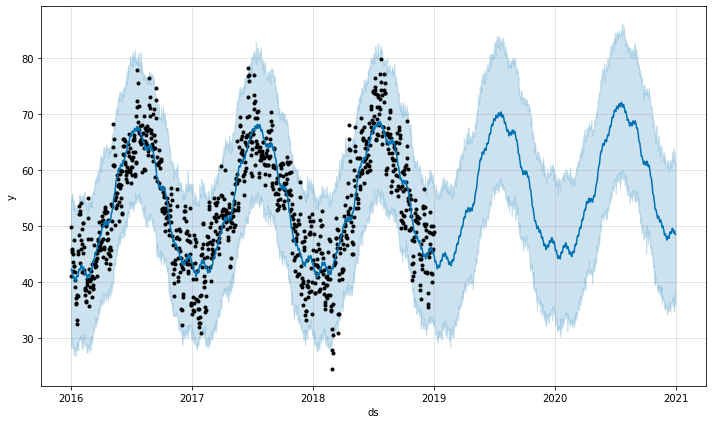

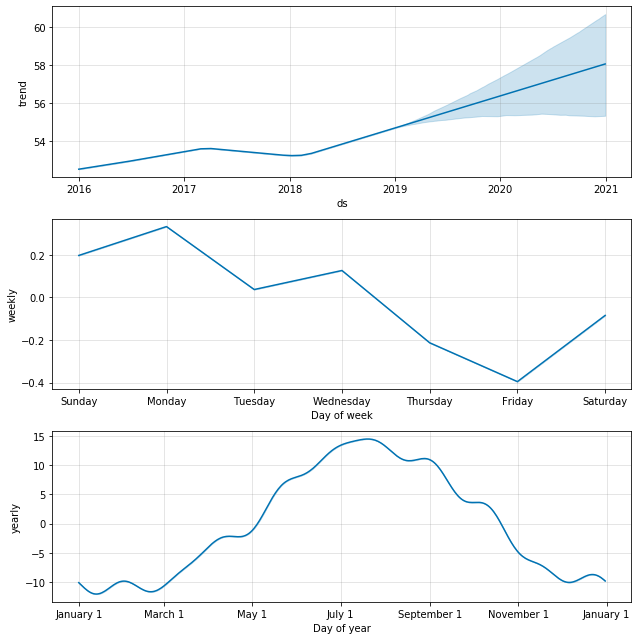

In [50]:
mycity = mycity[(mycity['ds']< '2019-01-01')&(mycity['ds']>= '2016-01-01')&(mycity['y']>=-60)]

m =  Prophet(#data,
            interval_width = 0.99,
            yearly_seasonality = True
            #weekly_seasonality = True,
            #daily_seasonality = True,
            #holidays = None,
            #changepoint_prior_scale = 0.05
            )


m.fit(mycity)

future = m.make_future_dataframe(periods=730)
#print(future.tail())

forecast = m.predict(future)
#print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

fig1 = m.plot(forecast)

fig2 = m.plot_components(forecast)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Thurstan\.conda\envs\pythonlearningx64\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


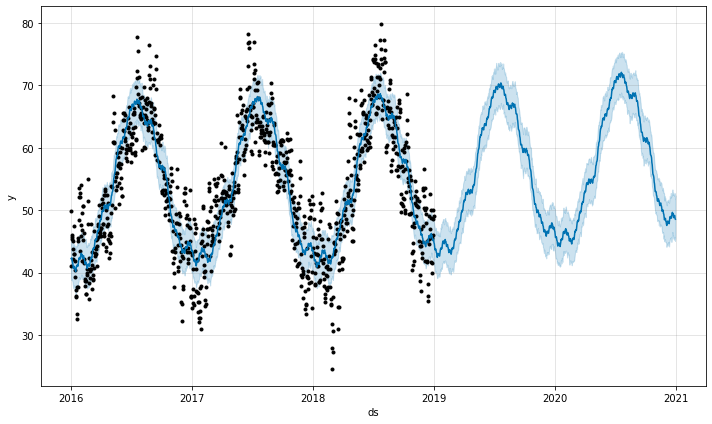

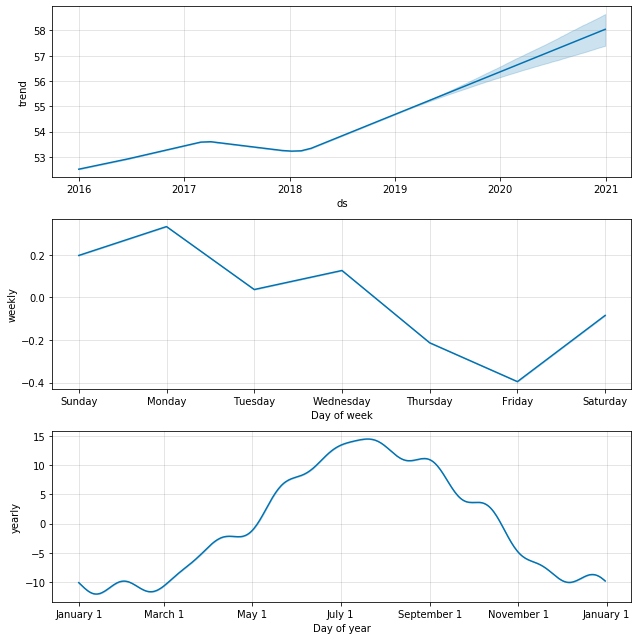

In [51]:
mycity = mycity[(mycity['ds']< '2019-01-01')&(mycity['ds']>= '2016-01-01')&(mycity['y']>=-60)]

m =  Prophet(#data,
            interval_width = 0.5,
            yearly_seasonality = True
            #weekly_seasonality = True,
            #daily_seasonality = True,
            #holidays = None,
            #changepoint_prior_scale = 0.05
            )


m.fit(mycity)

future = m.make_future_dataframe(periods=730)
#print(future.tail())

forecast = m.predict(future)
#print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

fig1 = m.plot(forecast)

fig2 = m.plot_components(forecast)


# reading the output

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Thurstan\.conda\envs\pythonlearningx64\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


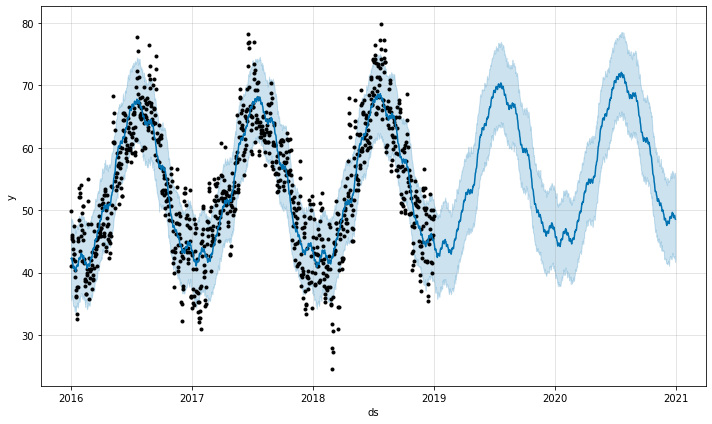

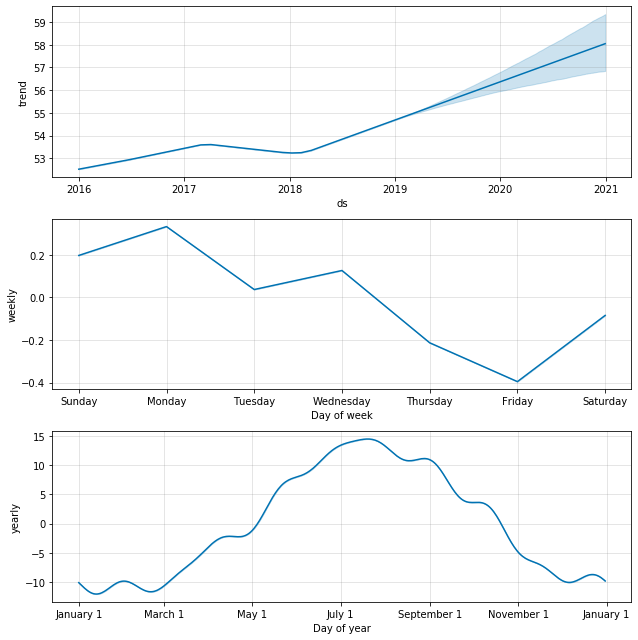

In [81]:
mycity = df[df['City']=='London'][['recdate','AvgTemperature']]
# need a ds (Datestamp) and y column
mycity.set_axis(['ds','y'], axis=1, inplace=True)#if you want to do all cols at once

mycity = mycity[(mycity['ds']< '2019-01-01')&(mycity['ds']>= '2016-01-01')&(mycity['y']>=-60)]

m =  Prophet(#data,
            #interval_width = 0.95,
            #yearly_seasonality = True
            #weekly_seasonality = True,
            #daily_seasonality = True,
            #holidays = None,
            #changepoint_prior_scale = 0.05
            )


m.fit(mycity)

future = m.make_future_dataframe(periods=730)
#print(future.tail())

forecast = m.predict(future)
#print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

fig1 = m.plot(forecast)

fig2 = m.plot_components(forecast)


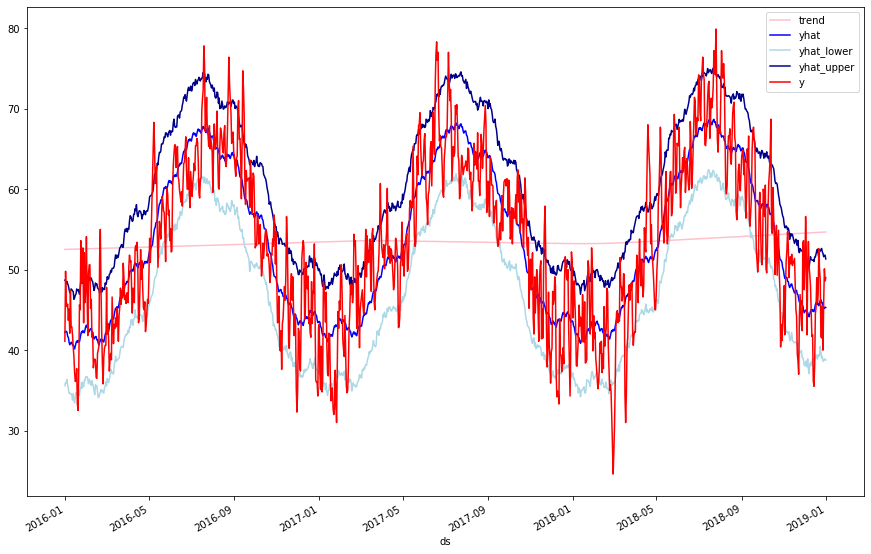

In [82]:
out1 = forecast[['ds','trend','yhat','yhat_lower','yhat_upper']]
out1 = out1.merge(mycity,on='ds')
out1.set_index('ds',inplace=True)
out1.plot(color=['pink','blue','lightblue','darkblue','red'], figsize=(15,10))

# set bounds - only works on the trend - not the seasonal boundies

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


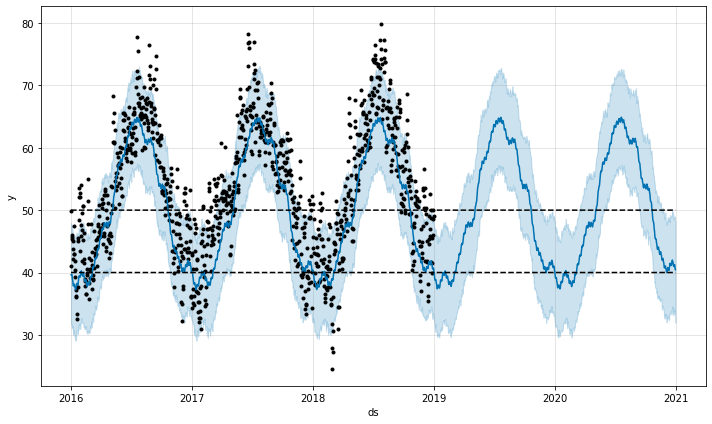

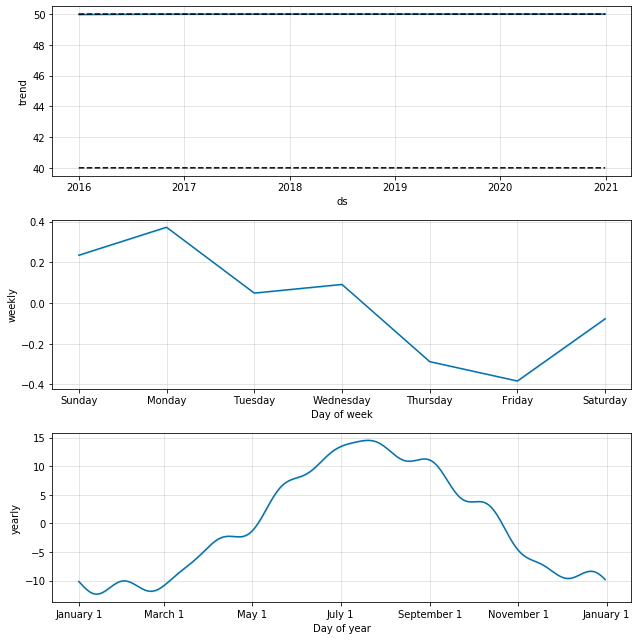

In [77]:
#pick a city

mycity = df[df['City']=='London'][['recdate','AvgTemperature']]
# need a ds (Datestamp) and y column
mycity.set_axis(['ds','y'], axis=1, inplace=True)#if you want to do all cols at once

mycity = mycity[(mycity['ds']< '2019-01-01')&(mycity['ds']>= '2016-01-01')&(mycity['y']>=-60)]

# add the cap you need to this below as well ----------------------------------
mycity['cap'] = 50 
mycity['floor'] = 40


m =  Prophet(#data,
            #interval_width = 0.95,
            #yearly_seasonality = True
            #weekly_seasonality = True,
            #daily_seasonality = True,
            #holidays = None,
            #changepoint_prior_scale = 0.05
    growth='logistic'
            )


m.fit(mycity)

future = m.make_future_dataframe(periods=730)

# add the cap you need to this here as well ----------------------------------
future['cap'] = 50 
future['floor'] = 40




forecast = m.predict(future)
#print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

fig1 = m.plot(forecast)

fig2 = m.plot_components(forecast)


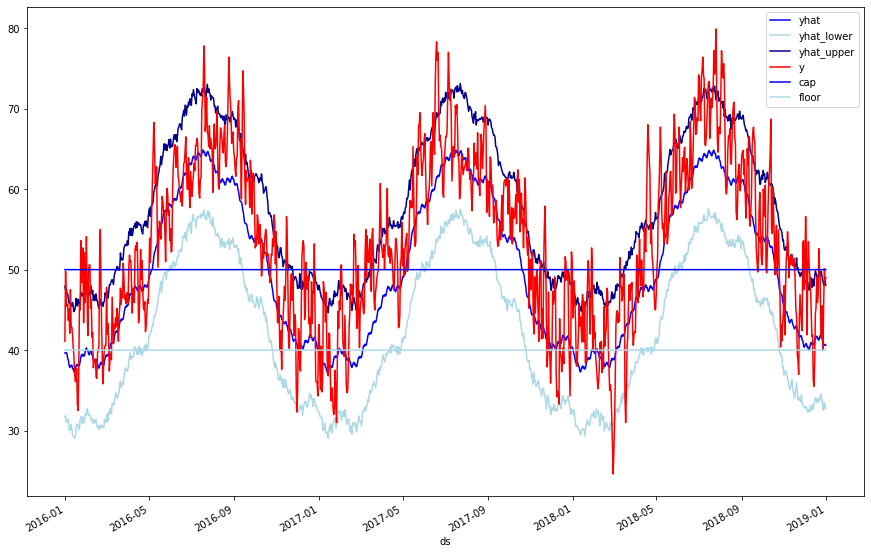

In [78]:
out1 = forecast[['ds','yhat','yhat_lower','yhat_upper']]
out1 = out1.merge(mycity,on='ds')
out1.set_index('ds',inplace=True)
out1.plot(color=['blue','lightblue','darkblue','red'], figsize=(15,10))